In [ ]:
!pip install pytesseract
!apt-get install tesseract-ocr
!pip install pillow
!pip install opencv-python-headless
!pip install matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,284 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

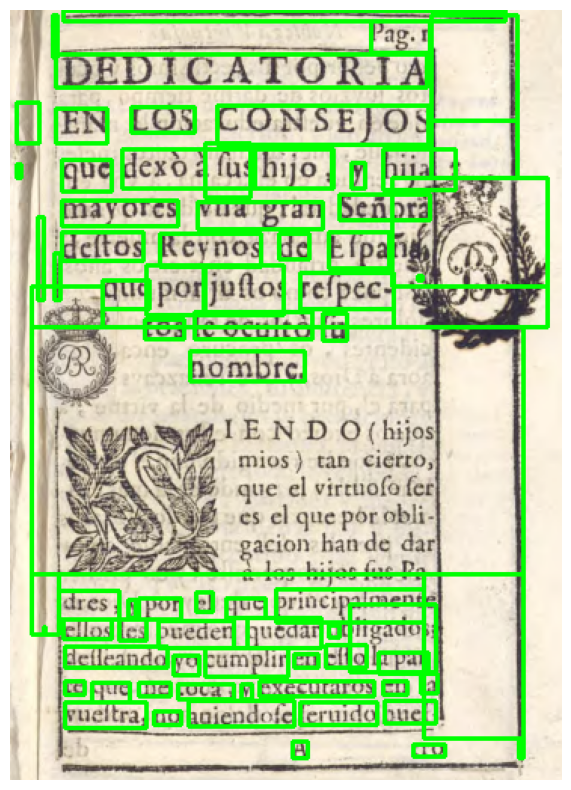

In [ ]:
# Import necessary libraries
from PIL import Image
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


# Load the image
image = Image.open('1.png')

# Convert to grayscale
gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

# Perform OCR with Tesseract
ocr_data = pytesseract.image_to_data(gray_image, output_type=pytesseract.Output.DICT)

# Draw bounding boxes around lines
output_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

n_boxes = len(ocr_data['level'])
for i in range(n_boxes):
    if ocr_data['level'][i] == 5:  # '5' corresponds to line level in the tesseract output
        (x, y, w, h) = (ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i])
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


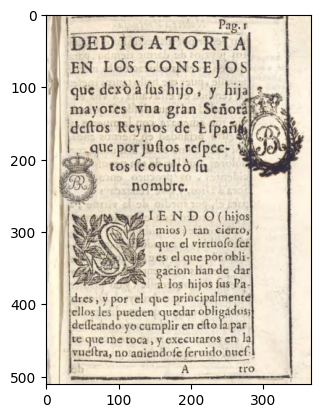

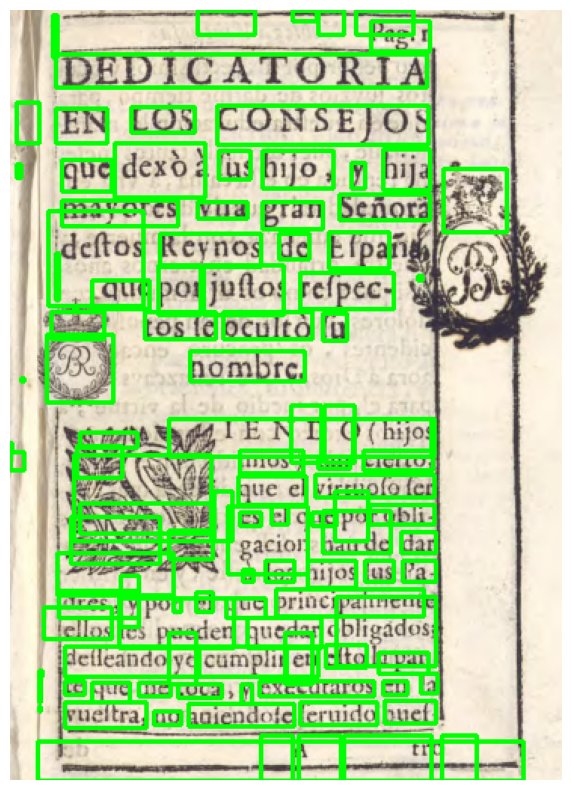

In [ ]:
# Import necessary libraries
from PIL import Image
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


image = Image.open('1.png')
plt.imshow(image)

# Convert to grayscale
gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

# Perform OCR with Tesseract using --psm 6 for line segmentation
custom_config = r'--oem 3 --psm 6'
ocr_data = pytesseract.image_to_data(gray_image, config=custom_config, output_type=pytesseract.Output.DICT)

# Draw bounding boxes around lines
output_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

n_boxes = len(ocr_data['level'])
for i in range(n_boxes):
    if ocr_data['level'][i] == 5:  # '5' corresponds to line level in the Tesseract output
        (x, y, w, h) = (ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i])
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
